In [9]:
import pandas as pd
import numpy as np
import re as re
pd.set_option('display.max_columns', None)

## Run .json file

In [2]:
file="collisions/oms_runs.json"
# file=open(path+"oms_runs.json")

In [3]:
df=pd.read_json(file)
df.columns

Index(['components', 'l1_hlt_mode_stripped', 'l1_key', 'duration', 'b_field',
       'tier0_transfer', 'l1_triggers_counter', 'hlt_physics_throughput',
       'init_lumi', 'last_update', 'beamactive_total_deadtime',
       'delivered_lumi', 'recorded_lumi', 'cmssw_version', 'energy',
       'end_lumi', 'hlt_physics_rate', 'fill_number', 'l1_hlt_mode',
       'end_time', 'trigger_mode', 'l1_key_stripped', 'fill_type_party2',
       'fill_type_party1', 'initial_prescale_index', 'sequence', 'start_time',
       'hlt_physics_size', 'fill_type_runtime', 'hlt_key', 'clock_type',
       'last_lumisection_number', 'l1_rate', 'l1_menu', 'run_number',
       'stable_beam', 'hlt_physics_counter', 'init_lumi_unit',
       'delivered_lumi_unit', 'recorded_lumi_unit', 'end_lumi_unit'],
      dtype='object')

In [4]:
df[["run_number",'l1_rate',"l1_key",]]

,run_number,l1_rate,l1_key
0,315264,48897.560,l1_trg_collisions2018/v10
1,315265,44289.950,l1_trg_collisions2018/v10
2,315266,NaN,l1_trg_collisions2018/v10
3,315267,40882.477,l1_trg_collisions2018/v10
4,315268,4.161,l1_trg_collisions2018/v10
5,315269,NaN,l1_trg_collisions2018/v10
6,315270,33561.880,l1_trg_collisions2018/v10
7,315273,30617.836,l1_trg_collisions2018/v10


## per fill .json file

In [5]:
file="collisions/oms_fills.json"
# file=open(path+"oms_runs.json")

In [6]:
df=pd.read_json(file)
print(df.columns)
print(df.shape)

Index(['peak_lumi', 'bunches_colliding', 'intensity_beam2', 'intensity_beam1',
       'to_ready_time', 'crossing_angle', 'dump_ready_to_dump_time',
       'end_stable_beam', 'duration', 'b_field', 'stop_crossing_angle',
       'beta_star', 'init_lumi', 'era', 'peak_specific_lumi', 'bunches_target',
       'injection_scheme', 'stable_beams', 'delivered_lumi', 'recorded_lumi',
       'last_run_number', 'energy', 'fill_number', 'start_crossing_angle',
       'efficiency_time', 'to_dump_ready_time', 'end_time', 'fill_type_party2',
       'fill_type_party1', 'beta_star_start', 'start_time', 'downtime',
       'peak_pileup', 'fill_type_runtime', 'first_run_number', 'bunches_beam1',
       'start_stable_beam', 'bunches_beam2', 'efficiency_lumi',
       'beta_star_stop', 'start_crossing_angle_unit', 'peak_lumi_unit',
       'intensity_beam2_unit', 'intensity_beam1_unit', 'crossing_angle_unit',
       'beta_star_start_unit', 'stop_crossing_angle_unit', 'beta_star_unit',
       'init_lumi_unit',

In [7]:
df[['era','fill_number', 'start_time', 'end_time',
    'peak_lumi', 'bunches_colliding', 
    'stable_beams','start_stable_beam',  'end_stable_beam', 'duration',
    'b_field', 'init_lumi',  'peak_specific_lumi', 'bunches_target',
       'injection_scheme','delivered_lumi', 'recorded_lumi',
    'first_run_number','last_run_number',
    'energy',  'start_crossing_angle',
       'efficiency_time', 'to_dump_ready_time', 'fill_type_party2',
       'fill_type_party1', 'downtime',
       'peak_pileup', 'fill_type_runtime', 'bunches_beam1',
       'bunches_beam2', 'efficiency_lumi']]

,era,fill_number,start_time,end_time,peak_lumi,bunches_colliding,stable_beams,start_stable_beam,end_stable_beam,duration,b_field,init_lumi,peak_specific_lumi,bunches_target,injection_scheme,delivered_lumi,recorded_lumi,first_run_number,last_run_number,energy,start_crossing_angle,efficiency_time,to_dump_ready_time,fill_type_party2,fill_type_party1,downtime,peak_pileup,fill_type_runtime,bunches_beam1,bunches_beam2,efficiency_lumi
0,2018A,6615,2018-04-26 07:15:48+00:00,2018-04-26 23:09:44+00:00,0.530741,590,True,2018-04-26T17:54:05Z,2018-04-26T23:04:52Z,18647,3.801,0.000002,5.855298,590,25ns_603b_590_526_547_96bpi_13inj,78.084328,57.996832,315193,315259,6499.32,160,77.597,218.0,PROTON,PROTON,4177,63.993752,PROTONS,603,603,74.275
1,2018A,6616,2018-04-26 23:09:44+00:00,2018-04-27 11:23:34+00:00,0.843972,974,True,2018-04-27T02:44:14Z,2018-04-27T11:18:38Z,30864,3.801,0.000002,5.623842,974,25ns_987b_974_876_912_96bpi_17inj,181.210906,160.616000,315260,315273,6499.32,160,91.724,NaN,PROTON,PROTON,2554,61.705254,PROTONS,987,987,88.635
2,2018A,6617,2018-04-27 11:23:34+00:00,2018-04-27 23:28:04+00:00,0.820939,974,True,2018-04-27T14:40:39Z,2018-04-27T23:21:21Z,31242,3.801,0.000006,5.569620,974,25ns_987b_974_878_917_144bpi_13inj,181.601438,177.182328,315274,315322,6499.32,160,99.839,220.0,PROTON,PROTON,50,59.959625,PROTONS,987,987,97.567


----

## Per HLTrate.json file

In [10]:
file="collisions/oms_hltrates.json"
# file=open(path+"oms_runs.json")

In [11]:
df=pd.read_json(file)
print(df.columns)
print(df.shape)

Index(['fill_number', 'start_time', 'last_lumisection_number', 'rate',
       'run_number', 'last_lumisection_in_run', 'first_lumisection_number',
       'counter', 'path_name'],
      dtype='object')
(23180, 9)


In [13]:
slimdf=df[["rate","last_lumisection_number","rate","run_number","counter","path_name"]]

In [16]:
for i in df["path_name"].unique():
    if "ZeroBias" in i:
        print(i)

AlCa_LumiPixels_ZeroBias_v8
DST_ZeroBias_BTagScouting_v13
DST_ZeroBias_CaloScouting_PFScouting_v12
DST_ZeroBias_v2
HLT_ZeroBias_Beamspot_v2
HLT_ZeroBias_FirstBXAfterTrain_v3
HLT_ZeroBias_FirstCollisionAfterAbortGap_v5
HLT_ZeroBias_FirstCollisionInTrain_v4
HLT_ZeroBias_IsolatedBunches_v5
HLT_ZeroBias_LastCollisionInTrain_v3
HLT_ZeroBias_part0_v6
HLT_ZeroBias_part1_v6
HLT_ZeroBias_part2_v6
HLT_ZeroBias_part3_v6
HLT_ZeroBias_part4_v6
HLT_ZeroBias_part5_v6
HLT_ZeroBias_part6_v6
HLT_ZeroBias_part7_v6
HLT_ZeroBias_v6


## Testing wbmcrawler 

In [4]:
!wbmcrawl --runs 315260 315273

Getting oms SSO Cookie for https://cmsoms.cern.ch/agg/api/v1/...
/Users/guillermofidalgo/opt/anaconda3/envs/OMS/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cmsoms.cern.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/guillermofidalgo/opt/anaconda3/envs/OMS/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'login.cern.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/guillermofidalgo/opt/anaconda3/envs/OMS/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'login.cern.ch'. Adding certificate verification is strongly advised

## look into new RUNS.json file

In [75]:
df=pd.read_json("oms_runs.json")

In [76]:
print(df.columns)
df.shape

Index(['components', 'l1_hlt_mode_stripped', 'l1_key', 'duration', 'b_field',
       'tier0_transfer', 'l1_triggers_counter', 'hlt_physics_throughput',
       'init_lumi', 'last_update', 'beamactive_total_deadtime',
       'delivered_lumi', 'recorded_lumi', 'cmssw_version', 'energy',
       'end_lumi', 'hlt_physics_rate', 'fill_number', 'l1_hlt_mode',
       'end_time', 'trigger_mode', 'l1_key_stripped', 'fill_type_party2',
       'fill_type_party1', 'initial_prescale_index', 'sequence', 'start_time',
       'hlt_physics_size', 'fill_type_runtime', 'hlt_key', 'clock_type',
       'last_lumisection_number', 'l1_rate', 'l1_menu', 'run_number',
       'stable_beam', 'hlt_physics_counter', 'init_lumi_unit',
       'delivered_lumi_unit', 'recorded_lumi_unit', 'end_lumi_unit'],
      dtype='object')


(10, 41)

In [77]:
df[['run_number','fill_number',
    'l1_hlt_mode_stripped', 'l1_key', 'duration', 'b_field',
       'tier0_transfer', 'l1_triggers_counter', 'hlt_physics_throughput',
       'init_lumi',  'end_lumi','last_lumisection_number',
    'last_update', 'beamactive_total_deadtime',
       'delivered_lumi', 'recorded_lumi', 'cmssw_version', 'energy',
       'hlt_physics_rate', 'hlt_key', 'clock_type',
        'l1_rate', 'l1_menu','l1_hlt_mode', 'start_time','end_time',
    'trigger_mode', 'l1_key_stripped', 'fill_type_party2',
       'fill_type_party1', 'initial_prescale_index', 'sequence',
       'hlt_physics_size', 'fill_type_runtime', 
       'stable_beam', 'hlt_physics_counter']]

,run_number,fill_number,l1_hlt_mode_stripped,l1_key,duration,b_field,tier0_transfer,l1_triggers_counter,hlt_physics_throughput,init_lumi,end_lumi,last_lumisection_number,last_update,beamactive_total_deadtime,delivered_lumi,recorded_lumi,cmssw_version,energy,hlt_physics_rate,hlt_key,clock_type,l1_rate,l1_menu,l1_hlt_mode,start_time,end_time,trigger_mode,l1_key_stripped,fill_type_party2,fill_type_party1,initial_prescale_index,sequence,hlt_physics_size,fill_type_runtime,stable_beam,hlt_physics_counter
0,315260,6616.0,cosmics2018/v105,l1_trg_cosmics2018/v63,2017,3.801,True,1720492.0,0.013732,0.000000,0.000000,85.0,2018-04-27T01:02:02Z,0.00,0.000000,0.000000,CMSSW_10_1_2_patch2,0.0,153.803,/cdaq/cosmic/commissioning2018/CRAFT/v1.2/HLT/V2,LOCAL,868.345,L1Menu_Collisions2018_0_0_1,cosmics2018,2018-04-26 23:16:41+00:00,2018-04-26 23:50:18+00:00,l1_hlt_cosmics2018/v105,cosmics2018/v63,PROTON,PROTON,0.0,GLOBAL-RUN,27.209,COSMICS,False,304742.0
1,315262,6616.0,circulating2018/v34,l1_trg_circulating2018/v18,8693,3.801,True,9480160.0,0.003490,0.000000,0.000000,371.0,2018-04-27T03:34:13Z,4.35,0.000000,0.000000,CMSSW_10_1_2_patch2,6499.0,50.183,/cdaq/special/Circulating2018/v1.0.3/HLT/V2,LHC,1111.201,L1Menu_Collisions2018_0_0_1,circulating2018,2018-04-27 00:00:20+00:00,2018-04-27 02:25:13+00:00,l1_hlt_circulating2018/v34,circulating2018/v18,PROTON,PROTON,2.0,GLOBAL-RUN,29.778,PROTONS,False,428142.0
2,315264,6616.0,collisions2018/v74,l1_trg_collisions2018/v10,6119,3.801,True,295208405.0,1.075522,0.842940,0.725879,261.0,2018-04-27T05:19:53Z,7.92,42.924551,39.385570,CMSSW_10_1_2_patch2,6499.0,1055.363,/cdaq/physics/Run2018/2e34/v1.1.0/HLT/V5,LHC,48897.560,L1Menu_Collisions2018_0_0_1,collisions2018,2018-04-27 02:32:42+00:00,2018-04-27 04:14:41+00:00,l1_hlt_collisions2018/v74,collisions2018/v10,PROTON,PROTON,3.0,GLOBAL-RUN,6493.351,PROTONS,True,6371642.0
3,315265,6616.0,collisions2018/v74,l1_trg_collisions2018/v10,1389,3.801,True,44393104.0,0.987777,0.725641,0.699951,58.0,2018-04-27T05:44:08Z,36.57,10.303512,6.651641,CMSSW_10_1_2_patch2,6499.0,1015.209,/cdaq/physics/Run2018/2e34/v1.1.0/HLT/V5,LHC,44289.950,L1Menu_Collisions2018_0_0_1,collisions2018,2018-04-27 04:18:00+00:00,2018-04-27 04:41:09+00:00,l1_hlt_collisions2018/v74,collisions2018/v10,PROTON,PROTON,3.0,GLOBAL-RUN,990.096,PROTONS,True,1017592.0
4,315266,6616.0,collisions2018/v74,l1_trg_collisions2018/v10,819,3.801,True,0.0,NaN,0.700102,0.685267,33.0,2018-04-27T06:00:10Z,100.00,6.610566,0.000000,CMSSW_10_1_2_patch2,6499.0,NaN,/cdaq/physics/Run2018/2e34/v1.1.0/HLT/V5,LHC,NaN,L1Menu_Collisions2018_0_0_1,collisions2018,2018-04-27 04:42:07+00:00,2018-04-27 04:55:46+00:00,l1_hlt_collisions2018/v74,collisions2018/v10,PROTON,PROTON,3.0,GLOBAL-RUN,NaN,PROTONS,True,NaN
5,315267,6616.0,collisions2018/v74,l1_trg_collisions2018/v10,5716,3.801,True,232524561.0,0.865909,0.685031,0.616229,244.0,2018-04-27T07:38:12Z,6.29,38.581152,36.354441,CMSSW_10_1_2_patch2,6499.0,953.282,/cdaq/physics/Run2018/2e34/v1.1.0/HLT/V5,LHC,40882.477,L1Menu_Collisions2018_0_0_1,collisions2018,2018-04-27 04:58:29+00:00,2018-04-27 06:33:45+00:00,l1_hlt_collisions2018/v74,collisions2018/v10,PROTON,PROTON,3.0,GLOBAL-RUN,4925.064,PROTONS,True,5422021.0
6,315268,6616.0,collisions2018/v74,l1_trg_collisions2018/v10,101,3.801,True,97.0,NaN,0.615901,0.611543,3.0,2018-04-27T07:44:56Z,100.00,2.430633,0.000000,CMSSW_10_1_2_patch2,6499.0,NaN,/cdaq/physics/Run2018/2e34/v1.1.0/HLT/V5,LHC,4.161,L1Menu_Collisions2018_0_0_1,collisions2018,2018-04-27 06:36:27+00:00,2018-04-27 06:38:08+00:00,l1_hlt_collisions2018/v74,collisions2018/v10,PROTON,PROTON,3.0,GLOBAL-RUN,NaN,PROTONS,True,NaN
7,315269,NaN,collisions2018/v74,l1_trg_collisions2018/v10,77,3.801,True,NaN,NaN,NaN,NaN,NaN,2018-04-27T08:10:32Z,NaN,NaN,NaN,None,NaN,NaN,None,LHC,NaN,L1Menu_Collisions2018_0_0_1,collisions2018,2018-04-27 06:40:31+00:00,2018-04-27 06:41:48+00:00,l1_hlt_collisions2018/v74,collisions2018/v10,None,None,NaN,GLOBAL-RUN,NaN,None,False,NaN
8,315270,6616.0,collisions2018/v74

In [80]:
slimdf=df[['run_number','fill_number',
    'l1_hlt_mode_stripped', 'l1_key',  'l1_triggers_counter', 
           'hlt_physics_rate', 'hlt_key', 'hlt_physics_throughput',
            'l1_rate', 'l1_menu','l1_hlt_mode', 'hlt_physics_size', 'fill_type_runtime', 
       'stable_beam', 'hlt_physics_counter',
           'start_time','end_time',
          'init_lumi', 'duration', 'end_lumi','last_lumisection_number','delivered_lumi', 'recorded_lumi']]

In [81]:
slimdf

,run_number,fill_number,l1_hlt_mode_stripped,l1_key,l1_triggers_counter,hlt_physics_rate,hlt_key,hlt_physics_throughput,l1_rate,l1_menu,l1_hlt_mode,hlt_physics_size,fill_type_runtime,stable_beam,hlt_physics_counter,start_time,end_time,init_lumi,duration,end_lumi,last_lumisection_number,delivered_lumi,recorded_lumi
0,315260,6616.0,cosmics2018/v105,l1_trg_cosmics2018/v63,1720492.0,153.803,/cdaq/cosmic/commissioning2018/CRAFT/v1.2/HLT/V2,0.013732,868.345,L1Menu_Collisions2018_0_0_1,cosmics2018,27.209,COSMICS,False,304742.0,2018-04-26 23:16:41+00:00,2018-04-26 23:50:18+00:00,0.000000,2017,0.000000,85.0,0.000000,0.000000
1,315262,6616.0,circulating2018/v34,l1_trg_circulating2018/v18,9480160.0,50.183,/cdaq/special/Circulating2018/v1.0.3/HLT/V2,0.003490,1111.201,L1Menu_Collisions2018_0_0_1,circulating2018,29.778,PROTONS,False,428142.0,2018-04-27 00:00:20+00:00,2018-04-27 02:25:13+00:00,0.000000,8693,0.000000,371.0,0.000000,0.000000
2,315264,6616.0,collisions2018/v74,l1_trg_collisions2018/v10,295208405.0,1055.363,/cdaq/physics/Run2018/2e34/v1.1.0/HLT/V5,1.075522,48897.560,L1Menu_Collisions2018_0_0_1,collisions2018,6493.351,PROTONS,True,6371642.0,2018-04-27 02:32:42+00:00,2018-04-27 04:14:41+00:00,0.842940,6119,0.725879,261.0,42.924551,39.385570
3,315265,6616.0,collisions2018/v74,l1_trg_collisions2018/v10,44393104.0,1015.209,/cdaq/physics/Run2018/2e34/v1.1.0/HLT/V5,0.987777,44289.950,L1Menu_Collisions2018_0_0_1,collisions2018,990.096,PROTONS,True,1017592.0,2018-04-27 04:18:00+00:00,2018-04-27 04:41:09+00:00,0.725641,1389,0.699951,58.0,10.303512,6.651641
4,315266,6616.0,collisions2018/v74,l1_trg_collisions2018/v10,0.0,NaN,/cdaq/physics/Run2018/2e34/v1.1.0/HLT/V5,NaN,NaN,L1Menu_Collisions2018_0_0_1,collisions2018,NaN,PROTONS,True,NaN,2018-04-27 04:42:07+00:00,2018-04-27 04:55:46+00:00,0.700102,819,0.685267,33.0,6.610566,0.000000
5,315267,6616.0,collisions2018/v74,l1_trg_collisions2018/v10,232524561.0,953.282,/cdaq/physics/Run2018/2e34/v1.1.0/HLT/V5,0.865909,40882.477,L1Menu_Collisions2018_0_0_1,collisions2018,4925.064,PROTONS,True,5422021.0,2018-04-27 04:58:29+00:00,2018-04-27 06:33:45+00:00,0.685031,5716,0.616229,244.0,38.581152,36.354441
6,315268,6616.0,collisions2018/v74,l1_trg_collisions2018/v10,97.0,NaN,/cdaq/physics/Run2018/2e34/v1.1.0/HLT/V5,NaN,4.161,L1Menu_Collisions2018_0_0_1,collisions2018,NaN,PROTONS,True,NaN,2018-04-27 06:36:27+00:00,2018-04-27 06:38:08+00:00,0.615901,101,0.611543,3.0,2.430633,0.000000
7,315269,NaN,collisions2018/v74,l1_trg_collisions2018/v10,NaN,NaN,None,NaN,NaN,L1Menu_Collisions2018_0_0_1,collisions2018,NaN,None,False,NaN,2018-04-27 06:40:31+00:00,2018-04-27 06:41:48+00:00,NaN,77,NaN,NaN,NaN,NaN
8,315270,6616.0,collisions2018/v74,l1_trg_collisions2018/v10,512411982.0,750.004,/cdaq/physics/Run2018/2e34/v1.1.0/HLT/V5,0.579569,33561.880,L1Menu_Collisions2018_0_0_1,collisions2018,8849.044,PROTONS,True,11451299.0,2018-04-27 06:43:28+00:00,2018-04-27 10:58:19+00:00,0.611140,15291,0.476770,655.0,80.010320,78.149695
9,315273,6616.0,collisions2018/v74,l1_trg_collisions2018/v10,33543948.0,328.393,/cdaq/physics/Run2018/2e34/v1.1.0/HLT/V5,0.053668,30617.836,L1Menu_Collisions2018_0_0_1,collisions2018,58.798,PROTONS,True,359784.0,2018-04-27 11:00:23+00:00,2018-04-27 11:19:28+00:00,0.000000,1145,0.000000,47.0,0.000000,0.000000


I will pick one run from this fill and get the lumisection.json for it

In [29]:
! wbmcrawl --lumisections 315265

Getting oms SSO Cookie for https://cmsoms.cern.ch/agg/api/v1/...
/Users/guillermofidalgo/opt/anaconda3/envs/OMS/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cmsoms.cern.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/guillermofidalgo/opt/anaconda3/envs/OMS/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'login.cern.ch'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/guillermofidalgo/opt/anaconda3/envs/OMS/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'login.cern.ch'. Adding certificate verification is strongly advised

In [62]:
df=pd.read_json("oms_lumisections.json")
print(df.columns,df.shape)
df

Index(['rp_time_ready', 'cscp_ready', 'physics_flag', 'dt0_ready',
       'beam1_present', 'bpix_ready', 'ho_ready', 'dtp_ready', 'tecm_ready',
       'gem_ready', 'lumisection_number', 'tibtid_ready', 'fpix_ready',
       'rpc_ready', 'rp_sect_56_ready', 'castor_ready', 'init_lumi', 'pileup',
       'esp_ready', 'eep_ready', 'hbhea_ready', 'ebm_ready', 'delivered_lumi',
       'recorded_lumi', 'dtm_ready', 'eem_ready', 'end_lumi', 'fill_number',
       'esm_ready', 'tecp_ready', 'end_time', 'ebp_ready', 'hf_ready',
       'rp_sect_45_ready', 'cscm_ready', 'cms_active', 'zdc_ready',
       'start_time', 'hbheb_ready', 'tob_ready', 'beam1_stable', 'hbhec_ready',
       'run_number', 'beam2_stable', 'beam2_present'],
      dtype='object') (63, 45)


,rp_time_ready,cscp_ready,physics_flag,dt0_ready,beam1_present,bpix_ready,ho_ready,dtp_ready,tecm_ready,gem_ready,lumisection_number,tibtid_ready,fpix_ready,rpc_ready,rp_sect_56_ready,castor_ready,init_lumi,pileup,esp_ready,eep_ready,hbhea_ready,ebm_ready,delivered_lumi,recorded_lumi,dtm_ready,eem_ready,end_lumi,fill_number,esm_ready,tecp_ready,end_time,ebp_ready,hf_ready,rp_sect_45_ready,cscm_ready,cms_active,zdc_ready,start_time,hbheb_ready,tob_ready,beam1_stable,hbhec_ready,run_number,beam2_stable,beam2_present
0,NaN,True,False,True,True,True,True,True,False,NaN,1,True,True,True,NaN,False,0.725641,53.053692,True,True,True,True,42.987969,39.413906,True,True,0.725491,6616,True,True,2018-04-27 04:19:18+00:00,True,True,NaN,True,True,False,2018-04-27 04:18:54+00:00,True,False,True,True,315265,True,True
1,NaN,True,False,True,True,True,True,True,False,NaN,2,True,True,True,NaN,False,0.725491,53.042721,True,True,True,True,43.157035,39.578902,True,True,0.725029,6616,True,True,2018-04-27 04:19:41+00:00,True,True,NaN,True,True,False,2018-04-27 04:19:18+00:00,True,False,True,True,315265,True,True
2,NaN,True,False,True,True,True,True,True,False,NaN,3,True,True,True,NaN,False,0.725029,53.008953,True,True,True,True,43.326008,39.675828,True,True,0.724675,6616,True,True,2018-04-27 04:20:04+00:00,True,True,NaN,True,True,False,2018-04-27 04:19:41+00:00,True,False,True,True,315265,True,True
3,NaN,True,True,True,True,True,True,True,True,NaN,4,True,True,True,NaN,False,0.724675,52.983070,True,True,True,True,43.494863,39.763777,True,True,0.724396,6616,True,True,2018-04-27 04:20:27+00:00,True,True,NaN,True,True,False,2018-04-27 04:20:04+00:00,True,True,True,True,315265,True,True
4,NaN,True,True,True,True,True,True,True,True,NaN,5,True,True,True,NaN,False,0.724396,52.962700,True,True,True,True,43.663672,39.928508,True,True,0.724134,6616,True,True,2018-04-27 04:20:51+00:00,True,True,NaN,True,True,False,2018-04-27 04:20:27+00:00,True,True,True,True,315265,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,NaN,True,True,True,True,True,True,True,True,NaN,59,True,True,True,NaN,False,0.701903,51.318172,True,True,True,True,52.638180,46.065547,True,True,0.701506,6616,True,True,2018-04-27 04:41:50+00:00,True,True,NaN,True,False,False,2018-04-27 04:41:26+00:00,True,True,True,True,315265,True,True
59,NaN,True,True,True,True,True,True,True,True,NaN,60,True,True,True,NaN,False,0.701506,51.289143,True,True,True,True,52.801680,46.065547,True,True,0.700857,6616,True,True,2018-04-27 04:42:13+00:00,True,True,NaN,True,False,False,2018-04-27 04:41:50+00:00,True,True,True,True,315265,True,True
60,NaN,True,True,True,True,True,True,True,True,NaN,61,True,True,True,NaN,False,0.700857,51.241714,True,True,True,True,52.965051,46.065547,True,True,0.700539,6616,True,True,2018-04-27 04:42:36+00:00,True,True,NaN,True,False,False,2018-04-27 04:42:13+00:00,True,True,True,True,315265,True,True
61,NaN,True,True,True,True,True,True,True,True,NaN,62,True,True,True,NaN,False,0.700539,51.218422,True,True,True,True,53.128316,46.065547,True,True,0.699951,6616,True,True,2018-04-27 04:42:59+00:00,True,True,NaN,True,False,False,2018-04-27 04:42:36+00:00,True,True,True,True,315265,True,True


In [63]:
dfslimm=df[['lumisection_number','init_lumi','end_lumi','pileup','delivered_lumi',
       'recorded_lumi', 'fill_number','start_time',
    'beam1_stable','run_number', 'beam2_stable', 'beam2_present']]

In [67]:
dfslimm

,lumisection_number,init_lumi,end_lumi,pileup,delivered_lumi,recorded_lumi,fill_number,start_time,beam1_stable,run_number,beam2_stable,beam2_present
0,1,0.725641,0.725491,53.053692,42.987969,39.413906,6616,2018-04-27 04:18:54+00:00,True,315265,True,True
1,2,0.725491,0.725029,53.042721,43.157035,39.578902,6616,2018-04-27 04:19:18+00:00,True,315265,True,True
2,3,0.725029,0.724675,53.008953,43.326008,39.675828,6616,2018-04-27 04:19:41+00:00,True,315265,True,True
3,4,0.724675,0.724396,52.983070,43.494863,39.763777,6616,2018-04-27 04:20:04+00:00,True,315265,True,True
4,5,0.724396,0.724134,52.962700,43.663672,39.928508,6616,2018-04-27 04:20:27+00:00,True,315265,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,0.701903,0.701506,51.318172,52.638180,46.065547,6616,2018-04-27 04:41:26+00:00,True,315265,True,True
59,60,0.701506,0.700857,51.289143,52.801680,46.065547,6616,2018-04-27 04:41:50+00:00,True,315265,True,True
60,61,0.700857,0.700539,51.241714,52.965051,46.065547,6616,2018-04-27 04:42:13+00:00,True,315265,True,True
61,62,0.700539,0.699951,51.218422,53.128316,46.065547,6616,2018-04-27 04:42:36+00:00,True,315265,True,True


<AxesSubplot:>

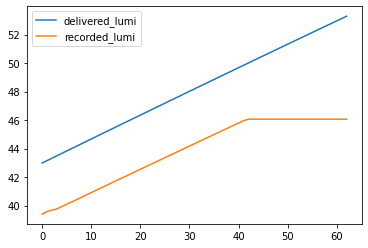

In [69]:
dfslimm[["delivered_lumi","recorded_lumi"]].plot()